In [1]:
import numpy as np
#import cv2
framerate = 29.18
from scipy import signal
from scipy.signal import argrelextrema

import matplotlib.pyplot as plt
from scipy.signal import find_peaks, peak_widths
#%cd "D:\Interfacial Waves resonance videos 0430"
framerate = 29.18

In [2]:
%cd data0526/

C:\Users\balin\Docs\boSchlieren\data0526


In [3]:
oneshillInterface = ['1_ak_ramp_0_75_rol_interface_runstdev_freq.dat', '1_ak_ramp_1_24_rol_interface_runstdev_freq.dat', '2_ak_ramp_1_24_rol_interface_runstdev_freq.dat', '2_ak_ramp_1_50_rol_le_interface_runstdev_freq.dat']
oneshillSurface = ['1_ak_ramp_0_75_rol_surface_runstdev_freq.dat', '1_ak_ramp_1_24_rol_surface_runstdev_freq.dat', '2_ak_ramp_1_24_rol_surface_runstdev_freq.dat', '2_ak_ramp_1_50_rol_le_surface_runstdev_freq.dat']



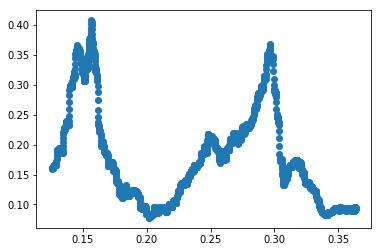

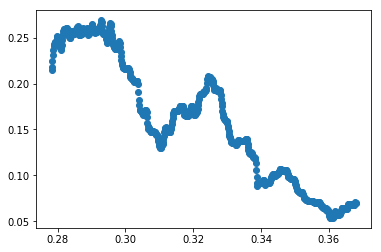

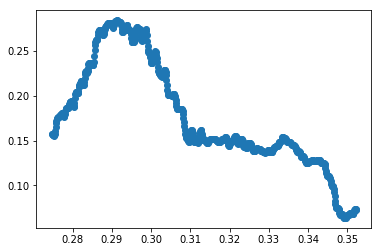

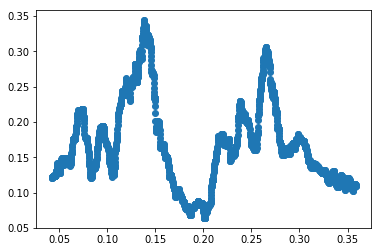

In [5]:
for o in oneshillInterface:
    asd = np.loadtxt(o)
    plt.plot(asd[:,0], asd[:,1], 'o')
    plt.show()

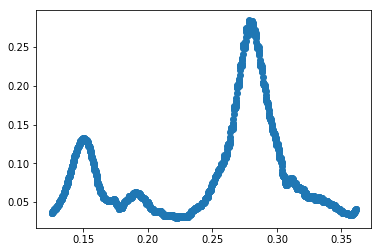

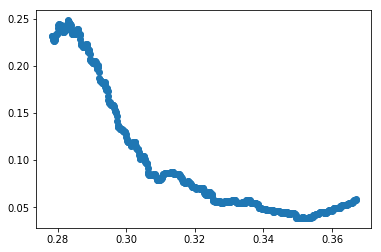

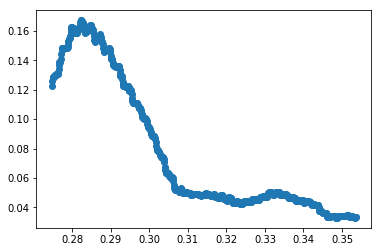

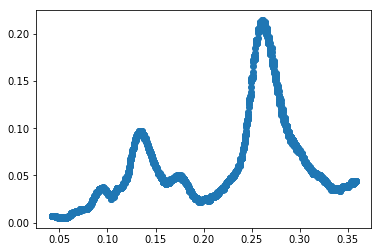

In [6]:
for o in oneshillSurface:
    asd = np.loadtxt(o)
    plt.plot(asd[:,0], asd[:,1], 'o')
    plt.show()

In [16]:
def normalize(timeseries):
    avg = np.average(timeseries)
    stdev = np.std(np.abs(timeseries))
    return (timeseries-avg)/stdev


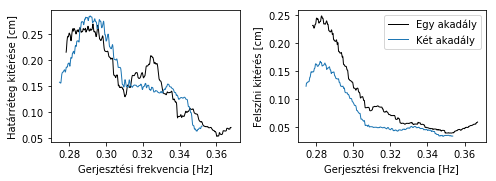

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2)
oneshill = np.loadtxt('1_ak_ramp_1_24_rol_interface_runstdev_freq.dat')
twoshill = np.loadtxt('2_ak_ramp_1_24_rol_interface_runstdev_freq.dat')
oneshills = np.loadtxt('1_ak_ramp_1_24_rol_surface_runstdev_freq.dat')
twoshills = np.loadtxt('2_ak_ramp_1_24_rol_surface_runstdev_freq.dat')
ax1.plot(oneshill[:,0], oneshill[:,1], '-', c='black',linewidth = 1)
ax1.plot(twoshill[:,0], twoshill[:,1], '-', linewidth = 1)
ax2.plot(oneshills[:,0], oneshills[:,1], '-', c='black', linewidth = 1, label='Egy akadály')
ax2.plot(twoshills[:,0], twoshills[:,1], '-', linewidth = 1, label='Két akadály')

ax2.legend(loc='upper right')
ax2.set_xlabel('Gerjesztési frekvencia [Hz]')
ax1.set_xlabel('Gerjesztési frekvencia [Hz]')
ax2.set_ylabel('Felszíni kitérés [cm]')
ax1.set_ylabel('Határréteg kitérése [cm]')
ratio = 8./6.
fig.set_size_inches(3.5*2, 3.5/ratio)
fig.tight_layout()
plt.savefig('1vs2_asdasd.pdf', bbox_inches='tight')

In [36]:
frozen1 = np.loadtxt('0419_frozenFreqs.dat')
frozen2 = np.loadtxt('0509_frozenFreqs.dat')


No handles with labels found to put in legend.


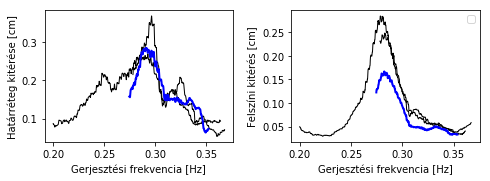

In [42]:
fig, (ax1, ax2) = plt.subplots(1, 2)
oneshillInterface = ['1_ak_ramp_0_75_rol_interface_runstdev_freq.dat', '1_ak_ramp_1_24_rol_interface_runstdev_freq.dat']
twoshillInterface = ['2_ak_ramp_1_24_rol_interface_runstdev_freq.dat']
oneshillSurface = ['1_ak_ramp_0_75_rol_surface_runstdev_freq.dat', '1_ak_ramp_1_24_rol_surface_runstdev_freq.dat']
twoshillSurface = ['2_ak_ramp_1_24_rol_surface_runstdev_freq.dat']
for o in oneshillInterface:
    asd = np.loadtxt(o)
    filt = np.logical_and(asd[:,0]< 0.4, asd[:,0]>0.2)
    ax1.plot(asd[filt][:,0], (asd[filt][:,1]), '-',linewidth = 1, c='black')
for t in twoshillInterface:
    asd = np.loadtxt(t)
    filt = np.logical_and(asd[:,0]< 0.4, asd[:,0]>0.2)
    ax1.plot(asd[filt][:,0], (asd[filt][:,1]), '-',linewidth = 2, c= 'Blue')
    
for o in oneshillSurface:
    asd = np.loadtxt(o)
    filt = np.logical_and(asd[:,0]< 0.4, asd[:,0]>0.2)
    ax2.plot(asd[filt][:,0], (asd[filt][:,1]), '-',linewidth = 1, c='black')
for t in twoshillSurface:
    asd = np.loadtxt(t)
    filt = np.logical_and(asd[:,0]< 0.4, asd[:,0]>0.2)
    ax2.plot(asd[filt][:,0], (asd[filt][:,1]), '-',linewidth = 2, c= 'Blue')
#ax1.plot(twoshill[:,0], twoshill[:,1], '-', linewidth = 1)
#ax2.plot(oneshills[:,0], oneshills[:,1], '-', c='black', linewidth = 1, label='Egy akadály')
#ax2.plot(twoshills[:,0], twoshills[:,1], '-', linewidth = 1, label='Két akadály')

ax2.legend(loc='upper right')
ax2.set_xlabel('Gerjesztési frekvencia [Hz]')
ax1.set_xlabel('Gerjesztési frekvencia [Hz]')
ax2.set_ylabel('Felszíni kitérés [cm]')
ax1.set_ylabel('Határréteg kitérése [cm]')
filt2 =  np.logical_and(frozen1[:,0]< 0.4, frozen1[:,0]>0.2)
#ax1.errorbar(frozen1[:,0][filt2], frozen1[:,1][filt2], fmt='o', xerr=frozen1[:,2][filt2], yerr=frozen1[:,3][filt2], c='Crimson')
#ax1.errorbar(frozen2[:,0], frozen2[:,1], fmt='o', xerr=frozen2[:,2], yerr=frozen2[:,3], c='Crimson')
ratio = 8./6.
fig.set_size_inches(3.5*2, 3.5/ratio)
fig.tight_layout()
plt.savefig('1vs2_ramps.pdf', bbox_inches='tight')